## Project: Python EDA using Netflix Userbase Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Netflix_Userbase.csv") 

In [4]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-2022,10-06-2023,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-2021,22-06-2023,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-2023,27-06-2023,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-2022,26-06-2023,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-2023,28-06-2023,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-2022,12-07-2023,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-2022,14-07-2023,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-2022,15-07-2023,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-2022,12-07-2023,Canada,48,Female,Tablet,1 Month


In [5]:
df.describe() 

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [7]:
df.nunique() 

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [8]:
df.isna().sum() 

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [9]:
average_revenue_by_subscription = df.groupby("Subscription Type")["Monthly Revenue"].mean() 

In [10]:
print(average_revenue_by_subscription)  

Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64


In [11]:
user_count_by_country = df.groupby("Country")["User ID"].count() 

In [12]:
print(user_count_by_country)  

Country
Australia         183
Brazil            183
Canada            317
France            183
Germany           183
Italy             183
Mexico            183
Spain             451
United Kingdom    183
United States     451
Name: User ID, dtype: int64


In [13]:
median_age_by_plan_duration = df.groupby("Plan Duration")["Age"].median() 

In [14]:
print(median_age_by_plan_duration) 

Plan Duration
1 Month    39.0
Name: Age, dtype: float64


In [15]:
total_revenue_by_gender = df.groupby("Gender")["Monthly Revenue"].sum() 

In [16]:
print(total_revenue_by_gender) 

Gender
Female    15736
Male      15535
Name: Monthly Revenue, dtype: int64


In [17]:
average_age_by_device = df.groupby("Device")["Age"].mean() 

In [18]:
print(average_age_by_device) 

Device
Laptop        39.036164
Smart TV      38.693443
Smartphone    38.726248
Tablet        38.720379
Name: Age, dtype: float64


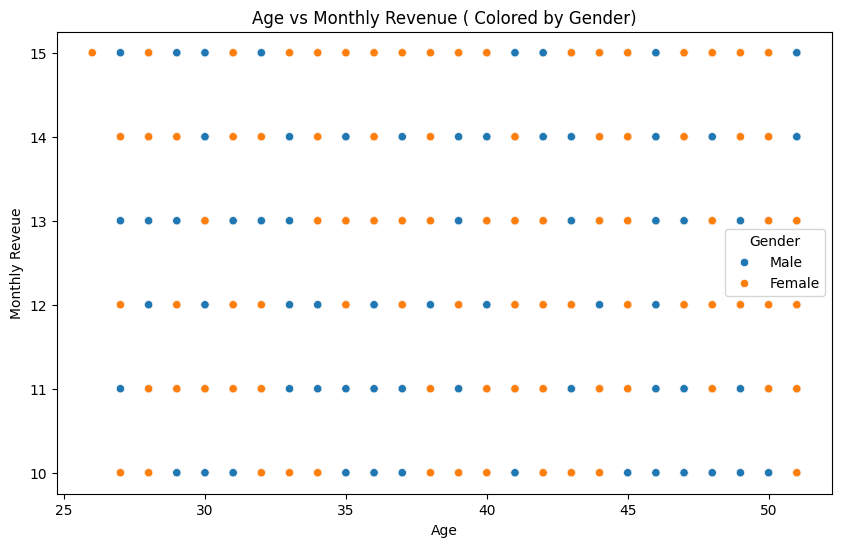

In [19]:
plt.figure(figsize = (10,6)) 
sns.scatterplot(x = "Age", y = "Monthly Revenue", hue = "Gender", data = df) 
plt.title("Age vs Monthly Revenue ( Colored by Gender)") 
plt.xlabel("Age") 
plt.ylabel("Monthly Reveue") 
plt.show() 

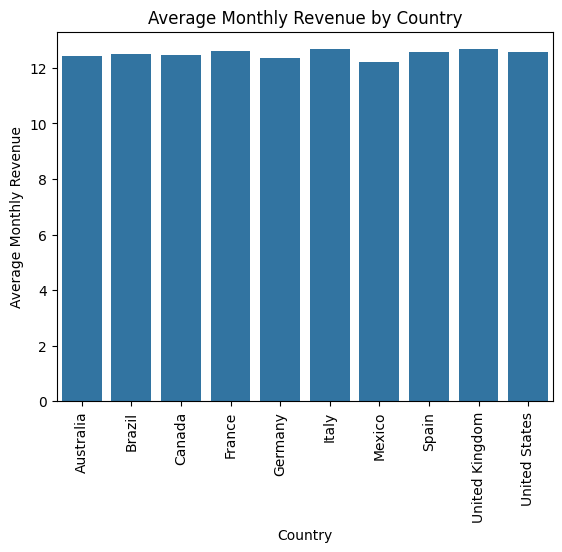

In [20]:
average_revenue_by_country = df.groupby("Country")["Monthly Revenue"].mean().reset_index()
sns.barplot(x = "Country", y = "Monthly Revenue", data = average_revenue_by_country) 
plt.title("Average Monthly Revenue by Country") 
plt.xlabel("Country") 
plt.ylabel("Average Monthly Revenue") 
plt.xticks( rotation = 90) 
plt.show() 

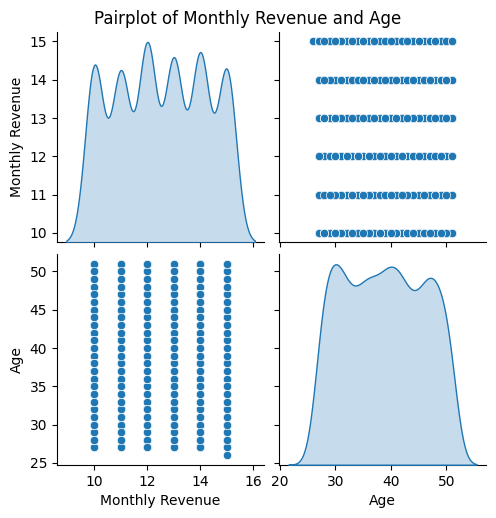

In [21]:
numerical_columns = ["Monthly Revenue", "Age"] 
sns.pairplot(df[numerical_columns], diag_kind = "kde") 
plt.suptitle("Pairplot of Monthly Revenue and Age", y = 1.02) 
plt.show()  

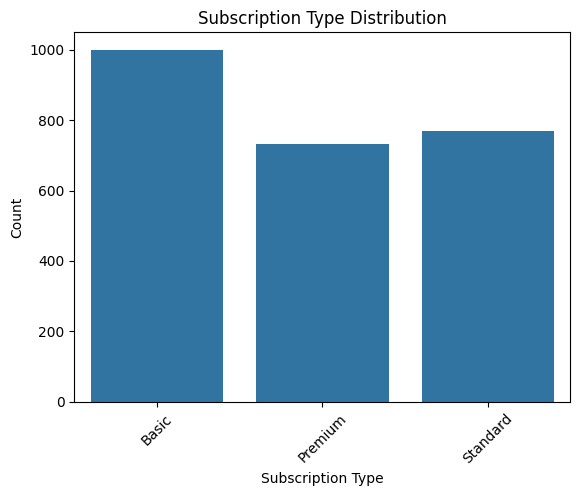

In [22]:
sns.countplot( x = "Subscription Type", data = df) 
plt.title("Subscription Type Distribution") 
plt.xlabel("Subscription Type")
plt.ylabel("Count") 
plt.xticks(rotation = 45) 
plt.show()  


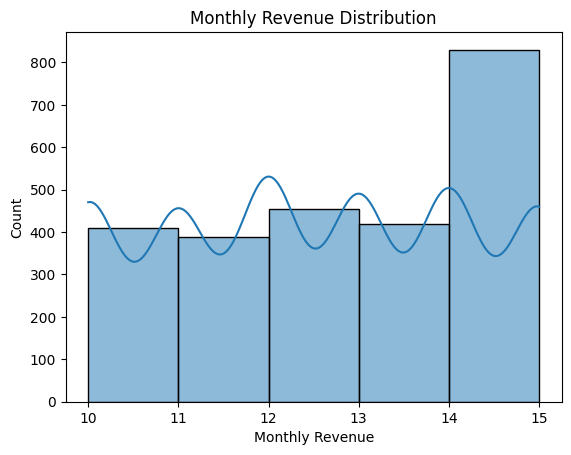

In [23]:
sns.histplot(df["Monthly Revenue"], bins = 5, kde = True) 
plt.title("Monthly Revenue Distribution") 
plt.xlabel("Monthly Revenue") 
plt.ylabel("Count") 
plt.show() 

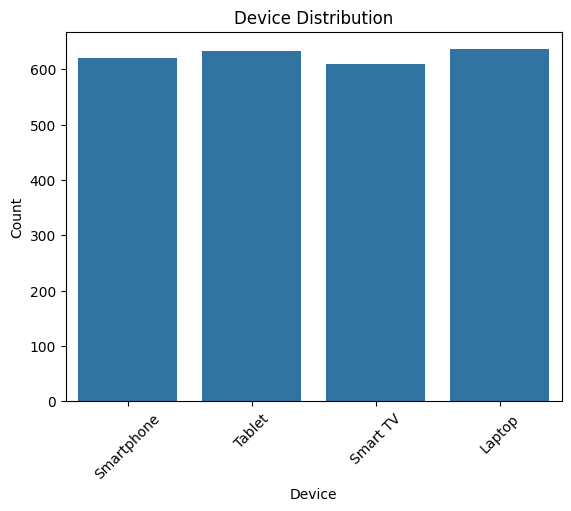

In [24]:
sns.countplot(x = "Device", data = df) 
plt.title("Device Distribution") 
plt.xlabel("Device") 
plt.ylabel("Count") 
plt.xticks(rotation = 45) 
plt.show() 

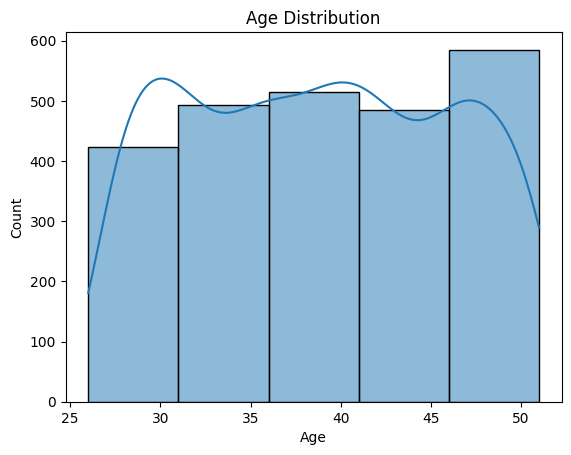

In [25]:
sns.histplot(df["Age"], bins = 5, kde = True) 
plt.title("Age Distribution") 
plt.xlabel("Age") 
plt.ylabel("Count") 
plt.show() 